In [1]:
import re 
import string
import PyPDF2
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [3]:
with open('young-robert-f-the-dandelion-girl.txt') as f:
    clean = f.read().splitlines()

In [4]:
clean

['-1-',
 '',
 'The Dandelion Girl',
 'Robert F. Young',
 'The girl on the hill made Mark think of Edna St. Vincent Millay. Perhaps it was because',
 'of the way she was standing there in the afternoon sun, her dandelion-hued hair dancing in the',
 'wind; perhaps it was because of the way her old-fashioned white dress was swirling around her',
 'long and slender legs. In any event, he got the definite impression that she had somehow stepped',
 "out of the past and into the present; and that was odd, because as things turned out, it wasn't the",
 'past she had stepped out of, but the future.',
 'He paused some distance behind her, breathing hard from the climb. She had not seen',
 'him yet, and he wondered how he could apprise her of his presence without alarming her. While',
 'he was trying to make up his mind, he took out his pipe and filled and lighted it, cupping his',
 'hands over the bowl and puffing till the tobacco came to glowing life. When he looked at her',
 'again, she had tu

In [5]:
shear = [re.sub(r"[^\w\d'\s]+", "", s) for s in clean] # get rid of punctuation
shear = [re.sub('\w*\d\w*', '', s) for s in shear] # get rid of numbers

shears = [x for x in shear if x != ' ']
shearss = [x for x in shears if x != '']

In [6]:
shear

['',
 '',
 'The Dandelion Girl',
 'Robert F Young',
 'The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because',
 'of the way she was standing there in the afternoon sun her dandelionhued hair dancing in the',
 'wind perhaps it was because of the way her oldfashioned white dress was swirling around her',
 'long and slender legs In any event he got the definite impression that she had somehow stepped',
 "out of the past and into the present and that was odd because as things turned out it wasn't the",
 'past she had stepped out of but the future',
 'He paused some distance behind her breathing hard from the climb She had not seen',
 'him yet and he wondered how he could apprise her of his presence without alarming her While',
 'he was trying to make up his mind he took out his pipe and filled and lighted it cupping his',
 'hands over the bowl and puffing till the tobacco came to glowing life When he looked at her',
 'again she had turned around and was regar

In [7]:
shears

['',
 '',
 'The Dandelion Girl',
 'Robert F Young',
 'The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because',
 'of the way she was standing there in the afternoon sun her dandelionhued hair dancing in the',
 'wind perhaps it was because of the way her oldfashioned white dress was swirling around her',
 'long and slender legs In any event he got the definite impression that she had somehow stepped',
 "out of the past and into the present and that was odd because as things turned out it wasn't the",
 'past she had stepped out of but the future',
 'He paused some distance behind her breathing hard from the climb She had not seen',
 'him yet and he wondered how he could apprise her of his presence without alarming her While',
 'he was trying to make up his mind he took out his pipe and filled and lighted it cupping his',
 'hands over the bowl and puffing till the tobacco came to glowing life When he looked at her',
 'again she had turned around and was regar

In [8]:
shearss

['The Dandelion Girl',
 'Robert F Young',
 'The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because',
 'of the way she was standing there in the afternoon sun her dandelionhued hair dancing in the',
 'wind perhaps it was because of the way her oldfashioned white dress was swirling around her',
 'long and slender legs In any event he got the definite impression that she had somehow stepped',
 "out of the past and into the present and that was odd because as things turned out it wasn't the",
 'past she had stepped out of but the future',
 'He paused some distance behind her breathing hard from the climb She had not seen',
 'him yet and he wondered how he could apprise her of his presence without alarming her While',
 'he was trying to make up his mind he took out his pipe and filled and lighted it cupping his',
 'hands over the bowl and puffing till the tobacco came to glowing life When he looked at her',
 'again she had turned around and was regarding him c

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/nyjoey/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
vect = TfidfVectorizer(ngram_range=(1,1),stop_words='english')

In [11]:
dtm = vect.fit_transform(shearss)

In [12]:
dtm

<380x1132 sparse matrix of type '<class 'numpy.float64'>'
	with 2211 stored elements in Compressed Sparse Row format>

In [13]:
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())

,able,abrupt,absence,access,accident,according,act,acute,ad,added,...,wouldn,writing,written,year,yearn,years,yellow,yes,yesterday,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.614139
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [14]:
lda = LatentDirichletAllocation(n_components=20)

In [15]:
lda_dtf = lda.fit_transform(dtm)

/home/nyjoey/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [16]:
import numpy as np
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [17]:
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
really        gently        looked        spent         right         
child         drainboard    standing      looking       way           
wanted        different     sun           touched       wonderingly   
evenings      air           hair          really        answer        
matter        did           said          live          held          
oh            pale          seen          left          said          
away          possibly      came          pier          thought       
did           arise         till          remarkable    drops         
desperately   come          known         person        feel          
mistaken      hazy          knew          said          young         




In [18]:
topic1 = np.argsort(lda_dtf[:,4])[::-1]
for i in topic1[:10]:
     print(shearss[i] + "\n")

He walked toward her slowly keenly aware of the nearness of the sky enjoying the feel

father smokes a pipe too she said and when he lights it he cups his hands the same way you

He raised the lid and picked up the dress with trembling fingers He held it by the

Her anger was as evanescent as it had been abrupt I know you didn't mean to hurt my

minutes the bingo bus would let her off at the corner and she would come walking down the

his lipsand the words sang in his ears all the way back through the woods to the cabin and

The name suited her The same way the white dress suited herthe way the blue sky

sense of wonder such an enthusiasm for life He could appreciate the two qualities all the more

daughter Well he wasn'tnot really He had been momentarily swayedthat was all For a

The mood of the moment lingered far longer than it had any right to and it was still with



In [19]:
topic2 = np.argsort(lda_dtf[:,3])[::-1]
for i in topic2[:10]:
    print(shearss[i] + "\n")

gravel drive led to a dirt road that gave access to the highway His station wagon stood by the

not really His lips brushed her forehead and briefly touched her hairthat was all I'm sorry

I'm studying to be a secretary she said She took a half step and made a pretty pirouette

from the shore in a stand of pines and a winding path connected it with the pier Behind it a

He washed the dishes and made coffee He spent the morning fishing off the pier

timidly before his desk It was inconceivable that a mere twenty years later he could be looking

twentythird century there aren't very many pleasant leas left

even told me  I don't want to live Without him there's nothing left to live fornothing

except for the four vacation weeks he had recently been allowing himself each year two of

There was an eagerness about the way she was looking at him that touched his heart I'm



In [20]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [21]:
d = path.dirname(__name__)

In [22]:
text = open(path.join(d, 'young-robert-f-the-dandelion-girl.txt')).read()

In [23]:
stopwords = set(STOPWORDS)

In [24]:
wc = WordCloud(background_color="black", max_words=2000, stopwords=stopwords)

In [25]:
wc.generate(text)

In [26]:
wc.to_file(path.join(d, "cloud.png"))

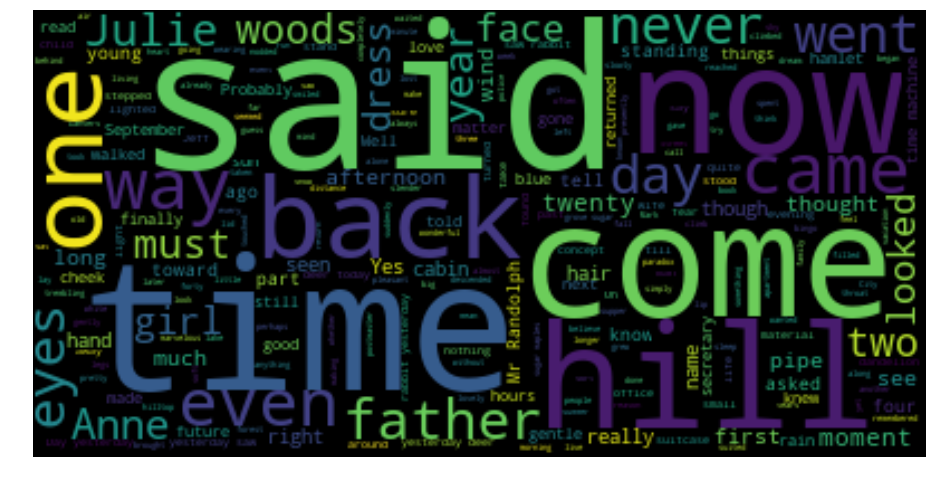

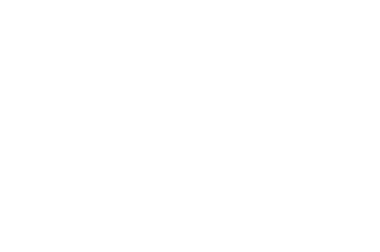

In [27]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()